In [20]:
import numpy as np
import pandas as pd
import os


files = [
    'causality_matrix_k25.csv',
    'causality_matrix_k50.csv',
    'causality_matrix_k100.csv',
    'causality_matrix_k200.csv',
    'causality_matrix_k400.csv'
]


file_prefix1 = './test_results_gpu/causal matrix_gpu'  
file_prefix2 = './test_results_before/causal matrix_before'  
def calculate_shd(matrix1, matrix2):
    """
    SHD
    """
    if matrix1.shape != matrix2.shape:
        raise ValueError("The matrices must have the same shape to compute SHD.")
    
   
    difference_matrix = matrix1 != matrix2
    
    
    shd = np.sum(difference_matrix)
    return shd/(matrix1.shape[0]*matrix1.shape[0])


for i in range(len(files)):
    file1 = os.path.join(file_prefix1, files[i])
    file2 = os.path.join(file_prefix2, files[i])
    
    
    matrix1 = pd.read_csv(file1, header=None).values
    matrix2 = pd.read_csv(file2, header=None).values
    
   
    try:
        shd_value = calculate_shd(matrix1, matrix2)
        print(f"SHD between {files[i]}: {shd_value}")
    except ValueError as e:
        print(f"Error comparing {files[i]}: {e}")


SHD between causality_matrix_k25.csv: 0.104
SHD between causality_matrix_k50.csv: 0.1472
SHD between causality_matrix_k100.csv: 0.1079
SHD between causality_matrix_k200.csv: 0.104775
SHD between causality_matrix_k400.csv: 0.10378125


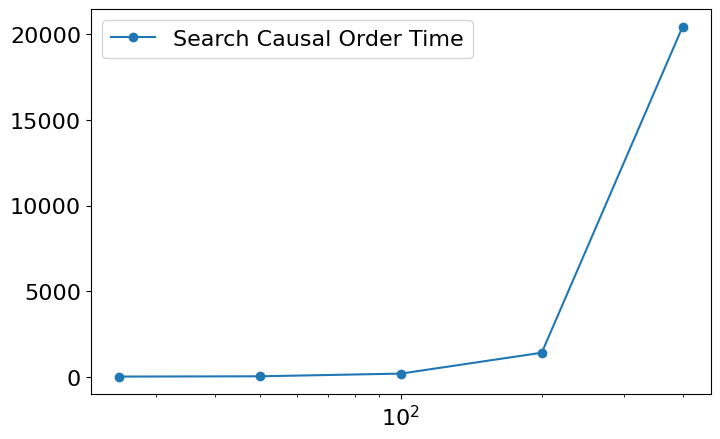

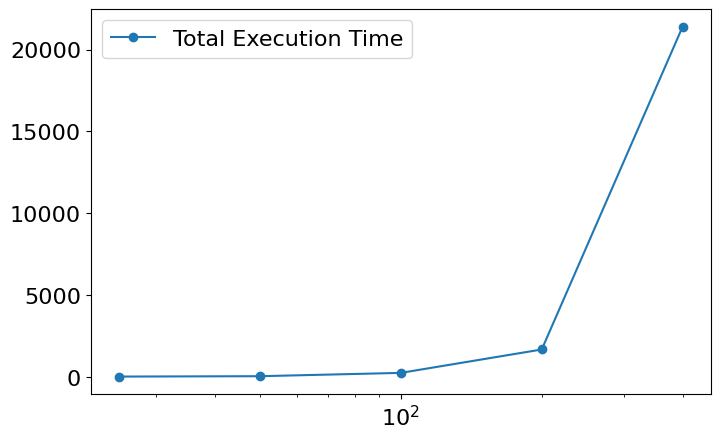

In [16]:
import pandas as pd

# Load the CSV file
file_path = './test_results_before/sp500_cpu_before.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()
import matplotlib.pyplot as plt

# Extract relevant columns
features = data['features']
execution_time = data['total excution time']
# precomp_time = data['precomputation']
search_co_time = data['search causal order']


# Plotting
plt.figure(figsize=(8, 5))

plt.plot(features, search_co_time, '-o', label='Search Causal Order Time')
#plt.plot(features, execution_time, '-o', label='Total Execution Time')
# plt.plot(features, search_co_time+precomp_time, '-o', label='Total Time of two steps')
# plt.plot(features, precomp_time, '-s', label='Precomputation Time')
# Set logarithmic scale for x-axis
plt.xscale('log')

# Adding labels and title
# plt.xlabel('Features')
# plt.ylabel('Execution Time (seconds)')
# plt.title('Execution Time vs. Features')
plt.legend(fontsize=16)
plt.xticks(fontsize=16)  # Adjust font size for x-axis tick labels
plt.yticks(fontsize=16)  # Adjust font size for y-axis tick labels
#plt.savefig('./execution_time_vs_features_1.pdf')
plt.savefig('./execution_time_vs_features_sp500_before1.pdf')
# Show the plot
plt.show() 


# Plotting
plt.figure(figsize=(8, 5))
plt.plot(features, execution_time, '-o', label='Total Execution Time')
# Set logarithmic scale for x-axis
plt.xscale('log')

# Adding labels and title
# plt.xlabel('Features')
# plt.ylabel('Execution Time (seconds)')
# plt.title('Execution Time vs. Features')
plt.legend(fontsize=16)
plt.xticks(fontsize=16)  # Adjust font size for x-axis tick labels
plt.yticks(fontsize=16)  # Adjust font size for y-axis tick labels
#plt.savefig('./execution_time_vs_features_2.pdf')
plt.savefig('./execution_time_vs_features_sp500_before2.pdf')
# Show the plot
plt.show()




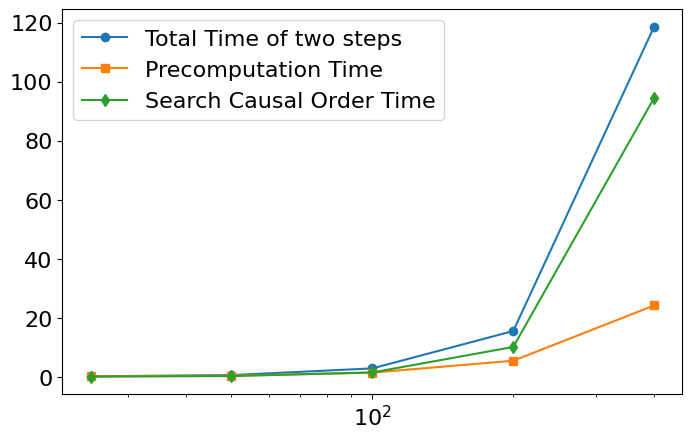

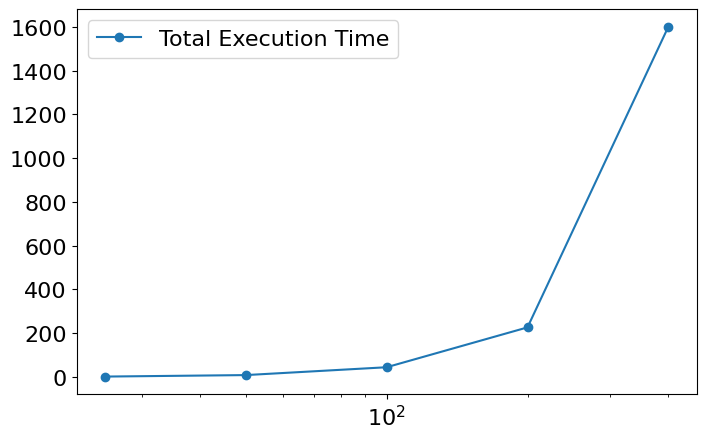

In [17]:
import pandas as pd

# Load the CSV file
file_path = './test_results_after/sp500_cpu_after.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()
import matplotlib.pyplot as plt

# Extract relevant columns
features = data['features']
execution_time = data['total excution time']
precomp_time = data['precomputation']
search_co_time = data['search causal order']

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(features, search_co_time+precomp_time, '-o', label='Total Time of two steps')
plt.plot(features, precomp_time, '-s', label='Precomputation Time')
plt.plot(features, search_co_time, '-d', label='Search Causal Order Time')
#plt.plot(features, execution_time, '-o', label='Total Execution Time')


# Set logarithmic scale for x-axis
plt.xscale('log')
#plt.yscale('log')
# Adding labels and title
# plt.xlabel('Features')
# plt.ylabel('Execution Time (seconds)')
# plt.title('Execution Time vs. Features')
plt.legend(fontsize=16)
plt.xticks(fontsize=16)  # Adjust font size for x-axis tick labels
plt.yticks(fontsize=16)  # Adjust font size for y-axis tick labels
plt.savefig('./execution_time_vs_features_sp500_after1.pdf')

# Show the plot
plt.show()


# Plotting
plt.figure(figsize=(8, 5))
plt.plot(features, execution_time, '-o', label='Total Execution Time')
# Set logarithmic scale for x-axis
plt.xscale('log')

# Adding labels and title
# plt.xlabel('Features')
# plt.ylabel('Execution Time (seconds)')
# plt.title('Execution Time vs. Features')
plt.legend(fontsize=16)
plt.xticks(fontsize=16)  # Adjust font size for x-axis tick labels
plt.yticks(fontsize=16)  # Adjust font size for y-axis tick labels
plt.savefig('./execution_time_vs_features_sp500_after2.pdf')
# Show the plot
plt.show()




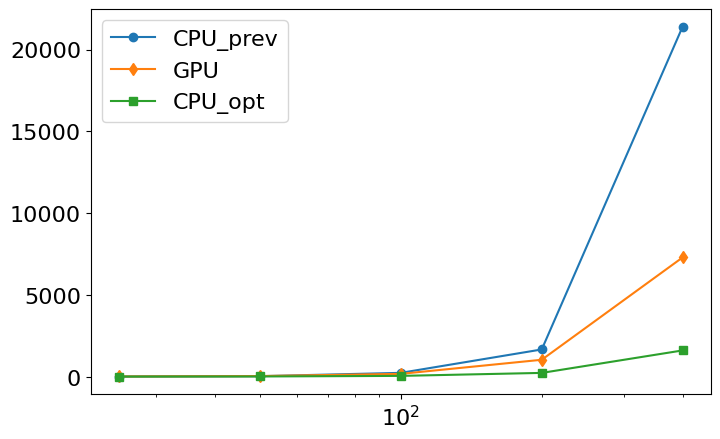

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
file_path_after = './test_results_after/sp500_cpu_after.csv'
file_path_before = './test_results_before/sp500_cpu_before.csv'
file_path_gpu = './test_results_gpu/sp500_gpu_after.csv'
data_after = pd.read_csv(file_path_after)
data_before = pd.read_csv(file_path_before)
data_gpu = pd.read_csv(file_path_gpu) 
# Extract relevant columns for 'after' data
features_after = data_after['features']
execution_time_after = data_after['total excution time']

# Extract relevant columns for 'before' data
features_before = data_before['features']
execution_time_before = data_before['total excution time']

features_gpu = data_gpu['features']
execution_time_gpu = data_gpu['total excution time']

# Plotting the combined graph
plt.figure(figsize=(8, 5))
# Plot total execution time for 'before' data
plt.plot(features_before, execution_time_before, '-o', label='CPU_prev')

# Plot total execution time for 'gpu' data
plt.plot(features_gpu, execution_time_gpu, '-d', label='GPU')
# Plot total execution time for 'after' data
plt.plot(features_after, execution_time_after, '-s', label='CPU_opt')

# Set logarithmic scale for x-axis
plt.xscale('log')

# Adding labels and title
#plt.xlabel('Features', fontsize=16)
#plt.ylabel('Execution Time (seconds)', fontsize=16)
# plt.title('Total Execution Time vs. Features (Before and After)', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)  # Adjust font size for x-axis tick labels
plt.yticks(fontsize=16)  # Adjust font size for y-axis tick labels

# Save and show the plot
plt.savefig('./execution_time_vs_features_combined.pdf')
plt.show()
